In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

/Users/alieser/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import numpy as np
import keras

In [4]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [5]:
import matplotlib.pyplot as plt

# TRAIN DATA PREPROCESSING

In [42]:
train_data=keras.utils.image_dataset_from_directory(
    '/Users/alieser/Desktop/Çalışmalar/Fruit vegetable detection/archive/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


* This function creates image dataset directly from given path.
* inferred label: Automatically extracts tags from the directory structure (we have labeled data).
* Categorical: one-hot encoding ile etiketler.
* Chosing batch size for eficient calculation.
* seed: Random number generator seed value used for shuffling and dataset splitting.
* Interpolation: Interpolation method to be used during resizing of images.

# VALIDATION DATA PREPROCESSING

In [43]:
val_data=keras.utils.image_dataset_from_directory(
    '/Users/alieser/Desktop/Çalışmalar/Fruit vegetable detection/archive/validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Model Building

In [44]:
cnn = tf.keras.models.Sequential()

Conv layer adding

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/Users/alieser/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
cnn.add(tf.keras.layers.Dropout(0.25))

Create one more layer to focus on details. Two is enough so that there is no overfitting.

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [48]:
cnn.add(tf.keras.layers.Dropout(0.25))  #To avoid overfitting

Flattening...

In [49]:
cnn.add(tf.keras.layers.Flatten())

In [50]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [51]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
# This is output layer.
# We have 36 classes in our dataset.
# We use softmax activation function. (For categorical...)


In [52]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [53]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# Compiling and Training

In [54]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# optimizer: it determines the learning rate of the model and how the weights are updated. (adam, stochastic gradient descent...)
# loss: Classic loss function.. Categorical_crossentropy for multi class.., mse for regression...

In [55]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
training_history=cnn.fit(x=train_data, validation_data=val_data,epochs=32)

Epoch 1/32


2024-07-26 20:30:10.554692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:58 1s/step - accuracy: 0.0000e+00 - loss: 96.1106

2024-07-26 20:30:10.825071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.0235 - loss: 98.3778 

2024-07-26 20:30:12.038420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.0281 - loss: 66.8597

2024-07-26 20:30:13.608456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.0279 - loss: 62.6445

2024-07-26 20:30:13.918479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:13.932416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:14.095008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.0279 - loss: 50.5951

2024-07-26 20:30:15.420263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.0269 - loss: 41.4768

2024-07-26 20:30:17.264106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.0268 - loss: 38.8393

2024-07-26 20:30:17.903022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.0267 - loss: 37.6690

2024-07-26 20:30:18.228996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.0267 - loss: 35.5714

2024-07-26 20:30:18.975094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.0266 - loss: 33.3226

2024-07-26 20:30:19.862994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:20.023075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.0265 - loss: 32.5189

2024-07-26 20:30:20.216351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.0265 - loss: 30.0511

2024-07-26 20:30:21.612392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.0265 - loss: 29.1311

2024-07-26 20:30:22.060916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.0264 - loss: 27.7464

2024-07-26 20:30:22.898980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:23.055531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.0263 - loss: 26.7533

2024-07-26 20:30:23.639865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.0262 - loss: 26.2900

2024-07-26 20:30:24.033874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.0261 - loss: 25.4227

2024-07-26 20:30:24.790353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.0259 - loss: 24.2512

2024-07-26 20:30:25.847969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.0257 - loss: 22.1350

2024-07-26 20:30:28.191756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:28.686948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - accuracy: 0.0257 - loss: 21.8521 - val_accuracy: 0.0313 - val_loss: 3.5820
Epoch 2/32
 4/98 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.0267 - loss: 3.5828

2024-07-26 20:30:30.401637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.0289 - loss: 3.5776

2024-07-26 20:30:32.240599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:32.424810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:32.435114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.0295 - loss: 3.5769

2024-07-26 20:30:32.466590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.0302 - loss: 3.5765

2024-07-26 20:30:32.806883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:32.839432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.0312 - loss: 3.5763

2024-07-26 20:30:33.452127: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:33.537669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.0339 - loss: 3.5764

2024-07-26 20:30:36.502013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.0348 - loss: 3.5766

2024-07-26 20:30:37.601968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.0351 - loss: 3.5767

2024-07-26 20:30:38.333503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.0354 - loss: 3.5770

2024-07-26 20:30:39.731224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:39.786603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.0356 - loss: 3.5771

2024-07-26 20:30:40.197550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:40.206771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.0357 - loss: 3.5771

2024-07-26 20:30:40.561131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:40.732291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.0359 - loss: 3.5773

2024-07-26 20:30:41.430368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.0360 - loss: 3.5774

2024-07-26 20:30:42.055131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:42.168998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.0362 - loss: 3.5778

2024-07-26 20:30:45.951858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:45.970025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.0361 - loss: 3.5779

2024-07-26 20:30:47.360824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:48.046448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.0360 - loss: 3.5779 - val_accuracy: 0.0456 - val_loss: 3.5676
Epoch 3/32
13/98 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.0485 - loss: 3.5726

2024-07-26 20:30:50.776699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.0463 - loss: 3.5729

2024-07-26 20:30:51.167079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:51.302244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.0447 - loss: 3.5733

2024-07-26 20:30:51.505841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.0434 - loss: 3.5736

2024-07-26 20:30:51.881258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:51.882186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.0425 - loss: 3.5738

2024-07-26 20:30:52.337244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:52.375251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.0415 - loss: 3.5740

2024-07-26 20:30:53.130279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.0414 - loss: 3.5741

2024-07-26 20:30:53.990527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.0417 - loss: 3.5742

2024-07-26 20:30:55.577795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.0417 - loss: 3.5742

2024-07-26 20:30:55.788326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.0416 - loss: 3.5743

2024-07-26 20:30:56.689308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:56.734281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.0415 - loss: 3.5745

2024-07-26 20:30:58.667530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.0414 - loss: 3.5745

2024-07-26 20:30:59.173283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:30:59.197993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.0412 - loss: 3.5746

2024-07-26 20:31:00.551319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:00.555104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:00.698374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.0412 - loss: 3.5746

2024-07-26 20:31:00.901592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.0411 - loss: 3.5746

2024-07-26 20:31:01.548282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.0410 - loss: 3.5746

2024-07-26 20:31:04.654677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.0409 - loss: 3.5742

2024-07-26 20:31:06.888675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:07.286371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.0409 - loss: 3.5742 - val_accuracy: 0.0912 - val_loss: 3.5169
Epoch 4/32


2024-07-26 20:31:07.603310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.0703 - loss: 3.5089

2024-07-26 20:31:08.107183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.0518 - loss: 3.5193

2024-07-26 20:31:08.797241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.0431 - loss: 3.5215

2024-07-26 20:31:09.802973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.0427 - loss: 3.5225

2024-07-26 20:31:10.413876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.0429 - loss: 3.5229

2024-07-26 20:31:10.725177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.0429 - loss: 3.5232

2024-07-26 20:31:10.944459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - accuracy: 0.0442 - loss: 3.5237

2024-07-26 20:31:12.182524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.0447 - loss: 3.5233

2024-07-26 20:31:13.242390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.0451 - loss: 3.5226

2024-07-26 20:31:13.721721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.0455 - loss: 3.5216

2024-07-26 20:31:14.624304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.0456 - loss: 3.5214

2024-07-26 20:31:15.014315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.0457 - loss: 3.5211

2024-07-26 20:31:16.076661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.0457 - loss: 3.5212

2024-07-26 20:31:16.625990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.0459 - loss: 3.5214

2024-07-26 20:31:18.143677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.0459 - loss: 3.5215

2024-07-26 20:31:18.461259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:18.481301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.0459 - loss: 3.5215

2024-07-26 20:31:18.685012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.0459 - loss: 3.5216

2024-07-26 20:31:19.205957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:19.336719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.0459 - loss: 3.5216

2024-07-26 20:31:19.570252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.0459 - loss: 3.5218

2024-07-26 20:31:20.273607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.0457 - loss: 3.5224

2024-07-26 20:31:22.224085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.0458 - loss: 3.5219

2024-07-26 20:31:25.441489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:25.868719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.0458 - loss: 3.5217 - val_accuracy: 0.0912 - val_loss: 3.4344
Epoch 5/32


2024-07-26 20:31:26.970424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 25s 268ms/step - accuracy: 0.0312 - loss: 3.5122

2024-07-26 20:31:27.509303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.0469 - loss: 3.4338

2024-07-26 20:31:29.389574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:29.423078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.0494 - loss: 3.4333

2024-07-26 20:31:29.684122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:29.806911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 16s 204ms/step - accuracy: 0.0531 - loss: 3.4303

2024-07-26 20:31:30.044728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.0554 - loss: 3.4279

2024-07-26 20:31:30.441054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - accuracy: 0.0594 - loss: 3.4220

2024-07-26 20:31:31.273478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.0625 - loss: 3.4206

2024-07-26 20:31:32.871054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.0634 - loss: 3.4213

2024-07-26 20:31:33.403677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - accuracy: 0.0639 - loss: 3.4223

2024-07-26 20:31:34.075308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.0655 - loss: 3.4247

2024-07-26 20:31:36.321934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.0658 - loss: 3.4251

2024-07-26 20:31:37.222779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:37.374166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.0661 - loss: 3.4249

2024-07-26 20:31:38.106479: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:38.106655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.0662 - loss: 3.4248

2024-07-26 20:31:38.461455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:38.615211: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.0667 - loss: 3.4242

2024-07-26 20:31:39.559044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.0668 - loss: 3.4240

2024-07-26 20:31:39.849651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.0671 - loss: 3.4238

2024-07-26 20:31:40.904933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.0672 - loss: 3.4237

2024-07-26 20:31:41.368570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.0675 - loss: 3.4220

2024-07-26 20:31:45.844649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:45.845613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.0675 - loss: 3.4218 - val_accuracy: 0.1368 - val_loss: 3.2352
Epoch 6/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.1389 - loss: 3.2697

2024-07-26 20:31:47.259914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.1079 - loss: 3.3092

2024-07-26 20:31:48.154412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.1009 - loss: 3.3077

2024-07-26 20:31:49.029830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:49.193878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.0980 - loss: 3.3048

2024-07-26 20:31:49.709008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - accuracy: 0.0959 - loss: 3.3059

2024-07-26 20:31:50.307696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:50.472591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.0938 - loss: 3.3066

2024-07-26 20:31:50.970690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:50.985438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.0863 - loss: 3.3128

2024-07-26 20:31:53.884706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.0853 - loss: 3.3134

2024-07-26 20:31:54.490054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.0851 - loss: 3.3135

2024-07-26 20:31:54.729504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.0845 - loss: 3.3140

2024-07-26 20:31:55.250733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.0827 - loss: 3.3158

2024-07-26 20:31:57.448692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.0825 - loss: 3.3160

2024-07-26 20:31:57.876217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:58.027488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:31:58.077182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.0822 - loss: 3.3162

2024-07-26 20:31:58.216553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.0820 - loss: 3.3163

2024-07-26 20:31:58.860275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.0819 - loss: 3.3163

2024-07-26 20:31:59.070799: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.0818 - loss: 3.3163

2024-07-26 20:31:59.415593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.0815 - loss: 3.3166

2024-07-26 20:32:00.977788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.0812 - loss: 3.3164

2024-07-26 20:32:02.823746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.0812 - loss: 3.3150

2024-07-26 20:32:05.201020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:06.515213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.0812 - loss: 3.3149 - val_accuracy: 0.2051 - val_loss: 3.0526
Epoch 7/32


2024-07-26 20:32:06.909216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.1250 - loss: 3.1042

2024-07-26 20:32:07.399186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 22s 245ms/step - accuracy: 0.1157 - loss: 3.1213

2024-07-26 20:32:08.341098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.1169 - loss: 3.1262

2024-07-26 20:32:09.528511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:09.654675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 17s 210ms/step - accuracy: 0.1169 - loss: 3.1281

2024-07-26 20:32:10.161456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - accuracy: 0.1155 - loss: 3.1383

2024-07-26 20:32:11.535029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - accuracy: 0.1151 - loss: 3.1421

2024-07-26 20:32:11.907610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:12.078088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.1129 - loss: 3.1541

2024-07-26 20:32:13.045381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.1119 - loss: 3.1580

2024-07-26 20:32:13.482317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.1085 - loss: 3.1709

2024-07-26 20:32:15.193101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:15.363040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.1081 - loss: 3.1728

2024-07-26 20:32:15.704264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.1063 - loss: 3.1816

2024-07-26 20:32:17.189046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.1061 - loss: 3.1830

2024-07-26 20:32:17.595805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.1061 - loss: 3.1842

2024-07-26 20:32:17.916938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:17.998204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.1059 - loss: 3.1875

2024-07-26 20:32:19.050248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.1057 - loss: 3.1890

2024-07-26 20:32:19.656146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.1056 - loss: 3.1900

2024-07-26 20:32:20.073214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.1053 - loss: 3.1935

2024-07-26 20:32:21.441426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.1052 - loss: 3.1944

2024-07-26 20:32:21.980586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1055 - loss: 3.1998

2024-07-26 20:32:25.193246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:25.541668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.1055 - loss: 3.2000 - val_accuracy: 0.2422 - val_loss: 2.9308
Epoch 8/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 35s 366ms/step - accuracy: 0.1875 - loss: 2.8861

2024-07-26 20:32:27.286701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.1305 - loss: 3.0720

2024-07-26 20:32:28.378318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.1284 - loss: 3.0821

2024-07-26 20:32:28.585214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.1233 - loss: 3.0948

2024-07-26 20:32:30.843459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 14s 190ms/step - accuracy: 0.1239 - loss: 3.0916

2024-07-26 20:32:31.401290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.1240 - loss: 3.0911

2024-07-26 20:32:31.613101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.1241 - loss: 3.0906

2024-07-26 20:32:32.125655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.1244 - loss: 3.0905

2024-07-26 20:32:32.617244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:32.660331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 47s 706ms/step - accuracy: 0.1248 - loss: 3.0906

2024-07-26 20:32:48.597505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 34s 590ms/step - accuracy: 0.1257 - loss: 3.0925

2024-07-26 20:32:50.317273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 29s 553ms/step - accuracy: 0.1262 - loss: 3.0934

2024-07-26 20:32:51.026099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 20s 478ms/step - accuracy: 0.1276 - loss: 3.0924

2024-07-26 20:32:53.070889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 19s 467ms/step - accuracy: 0.1279 - loss: 3.0921

2024-07-26 20:32:53.398518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - accuracy: 0.1282 - loss: 3.0917

2024-07-26 20:32:53.830723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:53.839808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 16s 449ms/step - accuracy: 0.1285 - loss: 3.0912

2024-07-26 20:32:54.280292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:32:54.392349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.1290 - loss: 3.0906

2024-07-26 20:32:54.985336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 13s 426ms/step - accuracy: 0.1291 - loss: 3.0906

2024-07-26 20:32:55.408792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 12s 419ms/step - accuracy: 0.1293 - loss: 3.0905

2024-07-26 20:32:55.762692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.1297 - loss: 3.0903

2024-07-26 20:32:56.476143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 6s 384ms/step - accuracy: 0.1305 - loss: 3.0896

2024-07-26 20:32:57.987424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.1328 - loss: 3.0876

2024-07-26 20:33:01.843680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:01.941094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 360ms/step - accuracy: 0.1329 - loss: 3.0874 - val_accuracy: 0.2849 - val_loss: 2.6780
Epoch 9/32


2024-07-26 20:33:02.362713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.1328 - loss: 2.9587

2024-07-26 20:33:02.907260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - accuracy: 0.1330 - loss: 3.0214

2024-07-26 20:33:05.021629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.1345 - loss: 3.0188

2024-07-26 20:33:05.580564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.1361 - loss: 3.0142

2024-07-26 20:33:06.181249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:06.372066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:06.377516: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - accuracy: 0.1390 - loss: 3.0001

2024-07-26 20:33:07.293730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - accuracy: 0.1395 - loss: 2.9986

2024-07-26 20:33:07.514143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.1420 - loss: 2.9890

2024-07-26 20:33:09.525697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.1447 - loss: 2.9798

2024-07-26 20:33:11.003385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.1471 - loss: 2.9755

2024-07-26 20:33:12.789046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:12.818147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - accuracy: 0.1477 - loss: 2.9744

2024-07-26 20:33:13.254743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.1495 - loss: 2.9707

2024-07-26 20:33:14.412117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.1501 - loss: 2.9697

2024-07-26 20:33:14.758530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:14.758898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.1504 - loss: 2.9691

2024-07-26 20:33:14.962972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.1506 - loss: 2.9685

2024-07-26 20:33:15.168391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.1524 - loss: 2.9646

2024-07-26 20:33:16.375598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:16.418665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.1545 - loss: 2.9603

2024-07-26 20:33:18.197943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.1552 - loss: 2.9591

2024-07-26 20:33:19.006702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1588 - loss: 2.9503

2024-07-26 20:33:21.704357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:22.864487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - accuracy: 0.1590 - loss: 2.9497 - val_accuracy: 0.3875 - val_loss: 2.4025
Epoch 10/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.1545 - loss: 2.9240

2024-07-26 20:33:24.095219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - accuracy: 0.1819 - loss: 2.8604

2024-07-26 20:33:24.974268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.1871 - loss: 2.8563

2024-07-26 20:33:25.543789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.1874 - loss: 2.8626

2024-07-26 20:33:25.944692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:26.060368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.1902 - loss: 2.8614

2024-07-26 20:33:26.469483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:26.640264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.1931 - loss: 2.8523

2024-07-26 20:33:27.216888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 0.1963 - loss: 2.8411

2024-07-26 20:33:28.203894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.1973 - loss: 2.8340

2024-07-26 20:33:30.207385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.1982 - loss: 2.8326

2024-07-26 20:33:31.145625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.1982 - loss: 2.8332

2024-07-26 20:33:31.954202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.1987 - loss: 2.8346

2024-07-26 20:33:34.555862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:34.746222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.1987 - loss: 2.8347

2024-07-26 20:33:34.966481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.1988 - loss: 2.8347

2024-07-26 20:33:35.277549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.1989 - loss: 2.8344

2024-07-26 20:33:35.588984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.1990 - loss: 2.8338

2024-07-26 20:33:36.118166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:36.167867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:36.324708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.1992 - loss: 2.8331

2024-07-26 20:33:36.792961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.2003 - loss: 2.8295

2024-07-26 20:33:38.935641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.2010 - loss: 2.8274

2024-07-26 20:33:39.815364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.2031 - loss: 2.8207

2024-07-26 20:33:42.688659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:43.123273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.2034 - loss: 2.8199 - val_accuracy: 0.3875 - val_loss: 2.3834
Epoch 11/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - accuracy: 0.2031 - loss: 2.7638

2024-07-26 20:33:44.552010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:44.712454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.2013 - loss: 2.7576

2024-07-26 20:33:45.571843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.2048 - loss: 2.7305

2024-07-26 20:33:46.282465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.2108 - loss: 2.7078

2024-07-26 20:33:46.859747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:47.021299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.2256 - loss: 2.6934

2024-07-26 20:33:48.548113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.2310 - loss: 2.6950

2024-07-26 20:33:49.712096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.2329 - loss: 2.6975

2024-07-26 20:33:50.466042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.2351 - loss: 2.6980

2024-07-26 20:33:51.656701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:51.847730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.2373 - loss: 2.6965

2024-07-26 20:33:53.726092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.2376 - loss: 2.6964

2024-07-26 20:33:53.985940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.2385 - loss: 2.6950

2024-07-26 20:33:55.125087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.2389 - loss: 2.6942

2024-07-26 20:33:55.489395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.2393 - loss: 2.6934

2024-07-26 20:33:55.903419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.2397 - loss: 2.6925

2024-07-26 20:33:56.526941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.2402 - loss: 2.6913

2024-07-26 20:33:56.813447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.2407 - loss: 2.6903

2024-07-26 20:33:57.363697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:33:57.388351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.2422 - loss: 2.6860

2024-07-26 20:33:58.890344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.2432 - loss: 2.6833

2024-07-26 20:33:59.942557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.2447 - loss: 2.6798

2024-07-26 20:34:01.564733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.2474 - loss: 2.6734

2024-07-26 20:34:03.742843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:03.785719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.2476 - loss: 2.6729 - val_accuracy: 0.4387 - val_loss: 2.2379
Epoch 12/32
 4/98 ━━━━━━━━━━━━━━━━━━━━ 27s 288ms/step - accuracy: 0.3236 - loss: 2.4419

2024-07-26 20:34:06.409858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:06.458866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.3226 - loss: 2.4408

2024-07-26 20:34:07.430093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.3228 - loss: 2.4394

2024-07-26 20:34:08.076173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:08.229052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 19s 233ms/step - accuracy: 0.3224 - loss: 2.4414

2024-07-26 20:34:08.387213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.3175 - loss: 2.4610

2024-07-26 20:34:09.959538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - accuracy: 0.3166 - loss: 2.4640

2024-07-26 20:34:10.231835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:10.380260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.3095 - loss: 2.4813

2024-07-26 20:34:12.384798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.3077 - loss: 2.4849

2024-07-26 20:34:13.006900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:13.058405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.3061 - loss: 2.4880

2024-07-26 20:34:13.912181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.3035 - loss: 2.4946

2024-07-26 20:34:16.082997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:16.143460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.3031 - loss: 2.4959

2024-07-26 20:34:16.403975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - accuracy: 0.3022 - loss: 2.4984

2024-07-26 20:34:17.463996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:17.656826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.3011 - loss: 2.5011

2024-07-26 20:34:18.186674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.3009 - loss: 2.5018

2024-07-26 20:34:18.414576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.3005 - loss: 2.5031

2024-07-26 20:34:18.756461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.3000 - loss: 2.5048

2024-07-26 20:34:19.463150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.2979 - loss: 2.5096

2024-07-26 20:34:23.579288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.2973 - loss: 2.5105

2024-07-26 20:34:25.892045: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:26.050606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.2973 - loss: 2.5105 - val_accuracy: 0.4615 - val_loss: 2.0535
Epoch 13/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 43s 452ms/step - accuracy: 0.2500 - loss: 2.5403

2024-07-26 20:34:27.209792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.2442 - loss: 2.5675

2024-07-26 20:34:28.215044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.2525 - loss: 2.5611

2024-07-26 20:34:28.732998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - accuracy: 0.2732 - loss: 2.5128

2024-07-26 20:34:29.929520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:29.983066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.2762 - loss: 2.5063

2024-07-26 20:34:30.272225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - accuracy: 0.2855 - loss: 2.4886

2024-07-26 20:34:31.179889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 18s 238ms/step - accuracy: 0.2912 - loss: 2.4756

2024-07-26 20:34:32.039728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.2970 - loss: 2.4624

2024-07-26 20:34:34.312116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:34.343515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step - accuracy: 0.2984 - loss: 2.4578

2024-07-26 20:34:35.495910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.3004 - loss: 2.4525

2024-07-26 20:34:36.888424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.3011 - loss: 2.4507

2024-07-26 20:34:37.975001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.3025 - loss: 2.4486

2024-07-26 20:34:39.582280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.3027 - loss: 2.4483

2024-07-26 20:34:39.796078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:39.997696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.3032 - loss: 2.4479

2024-07-26 20:34:40.649092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:40.666983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - accuracy: 0.3035 - loss: 2.4476

2024-07-26 20:34:41.358038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.3043 - loss: 2.4460

2024-07-26 20:34:42.552970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.3052 - loss: 2.4441

2024-07-26 20:34:43.696288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.3055 - loss: 2.4433

2024-07-26 20:34:43.969026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.3069 - loss: 2.4402

2024-07-26 20:34:45.929309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.3090 - loss: 2.4355

2024-07-26 20:34:47.667246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:48.648360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.3092 - loss: 2.4351 - val_accuracy: 0.4330 - val_loss: 2.1368
Epoch 14/32


2024-07-26 20:34:49.343306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - accuracy: 0.2715 - loss: 2.5355

2024-07-26 20:34:50.426155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - accuracy: 0.3060 - loss: 2.4522

2024-07-26 20:34:52.372408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - accuracy: 0.3076 - loss: 2.4488

2024-07-26 20:34:52.628375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 16s 209ms/step - accuracy: 0.3104 - loss: 2.4444

2024-07-26 20:34:52.972168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:53.130632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.3124 - loss: 2.4432

2024-07-26 20:34:53.352944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - accuracy: 0.3151 - loss: 2.4406

2024-07-26 20:34:53.982598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.3172 - loss: 2.4394

2024-07-26 20:34:55.123833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:55.310456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.3176 - loss: 2.4393

2024-07-26 20:34:55.594153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.3189 - loss: 2.4450

2024-07-26 20:34:57.623970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:34:57.779699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.3199 - loss: 2.4443

2024-07-26 20:35:00.275165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.3199 - loss: 2.4445

2024-07-26 20:35:00.697467: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.3202 - loss: 2.4435

2024-07-26 20:35:02.095497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:02.148649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.3205 - loss: 2.4420

2024-07-26 20:35:02.773911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:02.805530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:02.943727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.3213 - loss: 2.4386

2024-07-26 20:35:04.129927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.3215 - loss: 2.4380

2024-07-26 20:35:04.352893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.3225 - loss: 2.4339

2024-07-26 20:35:05.461409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.3263 - loss: 2.4181

2024-07-26 20:35:08.837903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:09.191946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.3265 - loss: 2.4172 - val_accuracy: 0.5271 - val_loss: 1.8712
Epoch 15/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - accuracy: 0.4062 - loss: 2.1645

2024-07-26 20:35:11.127108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - accuracy: 0.3898 - loss: 2.1963

2024-07-26 20:35:12.435603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 17s 203ms/step - accuracy: 0.3896 - loss: 2.1953

2024-07-26 20:35:13.140794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - accuracy: 0.3893 - loss: 2.1973

2024-07-26 20:35:13.664805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.3895 - loss: 2.1991

2024-07-26 20:35:13.989422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:13.996120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:14.038067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.3893 - loss: 2.2000

2024-07-26 20:35:14.253892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.3804 - loss: 2.2268

2024-07-26 20:35:16.710153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.3771 - loss: 2.2345

2024-07-26 20:35:17.782910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.3754 - loss: 2.2374

2024-07-26 20:35:18.531481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.3719 - loss: 2.2420

2024-07-26 20:35:20.628088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.3712 - loss: 2.2425

2024-07-26 20:35:21.374979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.3701 - loss: 2.2441

2024-07-26 20:35:22.259925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.3698 - loss: 2.2447

2024-07-26 20:35:22.513144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:22.583813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.3688 - loss: 2.2467

2024-07-26 20:35:23.250671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.3683 - loss: 2.2480

2024-07-26 20:35:23.560584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.3675 - loss: 2.2498

2024-07-26 20:35:24.184706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.3664 - loss: 2.2529

2024-07-26 20:35:25.619158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.3658 - loss: 2.2548

2024-07-26 20:35:26.925708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:27.038046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.3653 - loss: 2.2561

2024-07-26 20:35:28.184637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.3652 - loss: 2.2560

2024-07-26 20:35:30.869750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:31.265901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.3652 - loss: 2.2558 - val_accuracy: 0.5356 - val_loss: 1.8601
Epoch 16/32
10/98 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.3578 - loss: 2.3664

2024-07-26 20:35:33.742764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step - accuracy: 0.3579 - loss: 2.3664

2024-07-26 20:35:34.314709: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.3577 - loss: 2.3648

2024-07-26 20:35:34.604026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.3570 - loss: 2.3684

2024-07-26 20:35:35.051357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:35.208076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.3570 - loss: 2.3690

2024-07-26 20:35:35.410593: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.3568 - loss: 2.3698

2024-07-26 20:35:35.646795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.3576 - loss: 2.3470

2024-07-26 20:35:38.516741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.3578 - loss: 2.3431

2024-07-26 20:35:38.921050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.3583 - loss: 2.3353

2024-07-26 20:35:39.639031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.3583 - loss: 2.3335

2024-07-26 20:35:39.865360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.3584 - loss: 2.3319

2024-07-26 20:35:40.098741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.3591 - loss: 2.3249

2024-07-26 20:35:41.144832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.3603 - loss: 2.3138

2024-07-26 20:35:42.512942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.3607 - loss: 2.3109

2024-07-26 20:35:42.919762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:42.945853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - accuracy: 0.3615 - loss: 2.3051

2024-07-26 20:35:43.730942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.3619 - loss: 2.3023

2024-07-26 20:35:44.185580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.3624 - loss: 2.2983

2024-07-26 20:35:44.766215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:44.779707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.3628 - loss: 2.2949

2024-07-26 20:35:45.508046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.3636 - loss: 2.2891

2024-07-26 20:35:46.829805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.3667 - loss: 2.2740

2024-07-26 20:35:50.529294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3687 - loss: 2.2663

2024-07-26 20:35:52.287414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:52.793819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.3689 - loss: 2.2654 - val_accuracy: 0.5413 - val_loss: 1.7768
Epoch 17/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.3559 - loss: 2.1896

2024-07-26 20:35:54.679808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - accuracy: 0.3409 - loss: 2.2478

2024-07-26 20:35:56.452748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - accuracy: 0.3433 - loss: 2.2475

2024-07-26 20:35:56.863832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:35:57.004951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 18s 230ms/step - accuracy: 0.3465 - loss: 2.2467

2024-07-26 20:35:57.695220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - accuracy: 0.3550 - loss: 2.2314

2024-07-26 20:36:00.078413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - accuracy: 0.3556 - loss: 2.2300

2024-07-26 20:36:00.284896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.3567 - loss: 2.2269

2024-07-26 20:36:00.538453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.3574 - loss: 2.2251

2024-07-26 20:36:00.773042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.3587 - loss: 2.2215

2024-07-26 20:36:01.132740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.3601 - loss: 2.2181

2024-07-26 20:36:01.585925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:01.606944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.3655 - loss: 2.2043

2024-07-26 20:36:03.529042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.3661 - loss: 2.2031

2024-07-26 20:36:03.743079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.3683 - loss: 2.1974

2024-07-26 20:36:04.873184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 0.3701 - loss: 2.1927

2024-07-26 20:36:05.845891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - accuracy: 0.3722 - loss: 2.1872

2024-07-26 20:36:07.075417: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.3731 - loss: 2.1848

2024-07-26 20:36:07.617985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:07.782042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.3750 - loss: 2.1801

2024-07-26 20:36:08.916349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.3764 - loss: 2.1764

2024-07-26 20:36:09.838341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.3783 - loss: 2.1719

2024-07-26 20:36:11.134874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.3800 - loss: 2.1678

2024-07-26 20:36:12.375501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.3835 - loss: 2.1593

2024-07-26 20:36:14.717616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:15.820283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.3838 - loss: 2.1588 - val_accuracy: 0.5613 - val_loss: 1.7248
Epoch 18/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.3359 - loss: 2.5891 

2024-07-26 20:36:17.658393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.3444 - loss: 2.5475

2024-07-26 20:36:17.967785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.3693 - loss: 2.3688

2024-07-26 20:36:19.441881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.3716 - loss: 2.3527

2024-07-26 20:36:19.856473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:19.870267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.3745 - loss: 2.3267

2024-07-26 20:36:20.195559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.3772 - loss: 2.3043

2024-07-26 20:36:20.650472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:20.811284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - accuracy: 0.3839 - loss: 2.2511

2024-07-26 20:36:22.139327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.3964 - loss: 2.1780

2024-07-26 20:36:26.091891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:26.199987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.3994 - loss: 2.1623

2024-07-26 20:36:27.380014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.4009 - loss: 2.1552

2024-07-26 20:36:28.139865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.4023 - loss: 2.1476

2024-07-26 20:36:28.997254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:29.142845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.4030 - loss: 2.1434

2024-07-26 20:36:29.717288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:29.829852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.4032 - loss: 2.1420

2024-07-26 20:36:29.959733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:30.127631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.4037 - loss: 2.1382

2024-07-26 20:36:30.780450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.4061 - loss: 2.1256

2024-07-26 20:36:33.261306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.4068 - loss: 2.1225

2024-07-26 20:36:33.905746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.4074 - loss: 2.1197

2024-07-26 20:36:34.554151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.4114 - loss: 2.1009

2024-07-26 20:36:39.555117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:39.792002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 238ms/step - accuracy: 0.4116 - loss: 2.1000 - val_accuracy: 0.5613 - val_loss: 1.6852
Epoch 19/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 50s 525ms/step - accuracy: 0.3438 - loss: 2.4829

2024-07-26 20:36:41.049206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 22s 235ms/step - accuracy: 0.3247 - loss: 2.4325

2024-07-26 20:36:41.529444: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.3568 - loss: 2.2946

2024-07-26 20:36:42.469274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.3656 - loss: 2.2454

2024-07-26 20:36:43.675493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step - accuracy: 0.3709 - loss: 2.2228

2024-07-26 20:36:44.517447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:44.536393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:44.599151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.3728 - loss: 2.2164

2024-07-26 20:36:44.848240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step - accuracy: 0.3855 - loss: 2.1688

2024-07-26 20:36:46.602277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.3939 - loss: 2.1378

2024-07-26 20:36:48.090605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.3957 - loss: 2.1317

2024-07-26 20:36:48.669357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 12s 231ms/step - accuracy: 0.4030 - loss: 2.1067

2024-07-26 20:36:51.012208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.4034 - loss: 2.1050

2024-07-26 20:36:51.321222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - accuracy: 0.4050 - loss: 2.0988

2024-07-26 20:36:52.128685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.4067 - loss: 2.0925

2024-07-26 20:36:52.728091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.4072 - loss: 2.0905

2024-07-26 20:36:53.004907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:36:53.187315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.4078 - loss: 2.0885

2024-07-26 20:36:53.268579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.4088 - loss: 2.0847

2024-07-26 20:36:53.583263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.4117 - loss: 2.0736

2024-07-26 20:36:55.225865: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.4138 - loss: 2.0653

2024-07-26 20:36:56.243816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.4174 - loss: 2.0507

2024-07-26 20:36:58.485449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.4210 - loss: 2.0373

2024-07-26 20:37:00.914511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.4244 - loss: 2.0257

2024-07-26 20:37:03.954076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:04.391221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.4247 - loss: 2.0249 - val_accuracy: 0.4900 - val_loss: 1.9768
Epoch 20/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.3802 - loss: 2.2273

2024-07-26 20:37:05.660123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 25s 271ms/step - accuracy: 0.3887 - loss: 2.2153

2024-07-26 20:37:05.902739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - accuracy: 0.4231 - loss: 2.1215

2024-07-26 20:37:07.493919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:07.693990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 20s 243ms/step - accuracy: 0.4244 - loss: 2.1194

2024-07-26 20:37:08.089679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 0.4244 - loss: 2.1191

2024-07-26 20:37:08.473701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.4246 - loss: 2.1179

2024-07-26 20:37:08.680412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.4263 - loss: 2.1072

2024-07-26 20:37:09.870167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.4275 - loss: 2.1005

2024-07-26 20:37:10.320374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.4302 - loss: 2.0796

2024-07-26 20:37:12.747549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.4305 - loss: 2.0779

2024-07-26 20:37:13.024869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.4317 - loss: 2.0716

2024-07-26 20:37:13.850330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.4324 - loss: 2.0677

2024-07-26 20:37:14.205180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.4341 - loss: 2.0569

2024-07-26 20:37:15.750252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.4346 - loss: 2.0542

2024-07-26 20:37:16.146724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.4355 - loss: 2.0497

2024-07-26 20:37:17.238482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.4359 - loss: 2.0483

2024-07-26 20:37:17.656855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:17.725267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.4362 - loss: 2.0472

2024-07-26 20:37:18.230999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - accuracy: 0.4369 - loss: 2.0439

2024-07-26 20:37:19.217963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.4381 - loss: 2.0384

2024-07-26 20:37:21.433818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.4387 - loss: 2.0355

2024-07-26 20:37:22.245902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.4409 - loss: 2.0259

2024-07-26 20:37:24.791004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.4431 - loss: 2.0171

2024-07-26 20:37:27.088883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:27.402504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - accuracy: 0.4433 - loss: 2.0163 - val_accuracy: 0.5869 - val_loss: 1.5849
Epoch 21/32


2024-07-26 20:37:28.541893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.4233 - loss: 2.1696

2024-07-26 20:37:29.921178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - accuracy: 0.4282 - loss: 2.0727

2024-07-26 20:37:32.001213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.4307 - loss: 2.0480

2024-07-26 20:37:32.980104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:33.091282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.4311 - loss: 2.0400

2024-07-26 20:37:33.282182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:33.392659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.4322 - loss: 2.0307

2024-07-26 20:37:33.727792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.4338 - loss: 2.0167

2024-07-26 20:37:34.697099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.4356 - loss: 2.0038

2024-07-26 20:37:35.748128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.4374 - loss: 1.9960

2024-07-26 20:37:36.906118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:36.929980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.4389 - loss: 1.9900

2024-07-26 20:37:38.052916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:38.059450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.4419 - loss: 1.9773

2024-07-26 20:37:40.017046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:40.040320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.4437 - loss: 1.9714

2024-07-26 20:37:41.385502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.4440 - loss: 1.9703

2024-07-26 20:37:41.627549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.4455 - loss: 1.9656

2024-07-26 20:37:42.719693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.4467 - loss: 1.9617

2024-07-26 20:37:43.708888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.4486 - loss: 1.9554

2024-07-26 20:37:45.123171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.4501 - loss: 1.9504

2024-07-26 20:37:46.266477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.4519 - loss: 1.9443

2024-07-26 20:37:47.900983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.4551 - loss: 1.9346

2024-07-26 20:37:50.601653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:51.177609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.4553 - loss: 1.9338 - val_accuracy: 0.5897 - val_loss: 1.5864
Epoch 22/32


2024-07-26 20:37:52.029778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 25s 266ms/step - accuracy: 0.4368 - loss: 1.9498

2024-07-26 20:37:53.034820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.4573 - loss: 1.8768

2024-07-26 20:37:54.583601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - accuracy: 0.4571 - loss: 1.8773

2024-07-26 20:37:55.010959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - accuracy: 0.4566 - loss: 1.8795

2024-07-26 20:37:55.221627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:55.221755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:37:55.354797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.4495 - loss: 1.9041

2024-07-26 20:37:56.462702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.4462 - loss: 1.9205

2024-07-26 20:37:58.175702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.4464 - loss: 1.9209

2024-07-26 20:37:58.738547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.4469 - loss: 1.9198

2024-07-26 20:37:58.996611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.4478 - loss: 1.9181

2024-07-26 20:38:00.732423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.4482 - loss: 1.9170

2024-07-26 20:38:01.214166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.4489 - loss: 1.9151

2024-07-26 20:38:02.031649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.4501 - loss: 1.9112

2024-07-26 20:38:03.240403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - accuracy: 0.4523 - loss: 1.9055

2024-07-26 20:38:04.806294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.4535 - loss: 1.9024

2024-07-26 20:38:05.585801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:05.598058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.4547 - loss: 1.8987

2024-07-26 20:38:06.369769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:06.563162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.4552 - loss: 1.8968

2024-07-26 20:38:06.773914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:06.964486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.4622 - loss: 1.8733

2024-07-26 20:38:11.881743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.4651 - loss: 1.8643

2024-07-26 20:38:13.959246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:14.468192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.4654 - loss: 1.8635 - val_accuracy: 0.5897 - val_loss: 1.6018
Epoch 23/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.3906 - loss: 2.0358

2024-07-26 20:38:16.098669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 0.4099 - loss: 2.0844

2024-07-26 20:38:17.012903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.4196 - loss: 2.0602

2024-07-26 20:38:17.269789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.4490 - loss: 1.9724

2024-07-26 20:38:18.633267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 18s 221ms/step - accuracy: 0.4539 - loss: 1.9527

2024-07-26 20:38:19.146000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 0.4580 - loss: 1.9377

2024-07-26 20:38:19.585161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.4626 - loss: 1.9220

2024-07-26 20:38:20.508809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:20.746662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.4673 - loss: 1.9048

2024-07-26 20:38:21.862559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.4701 - loss: 1.8946

2024-07-26 20:38:22.443859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.4735 - loss: 1.8814

2024-07-26 20:38:23.474722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 13s 226ms/step - accuracy: 0.4775 - loss: 1.8660

2024-07-26 20:38:24.405837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 13s 226ms/step - accuracy: 0.4782 - loss: 1.8633

2024-07-26 20:38:24.787539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 0.4803 - loss: 1.8546

2024-07-26 20:38:25.589329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.4831 - loss: 1.8413

2024-07-26 20:38:27.569195: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.4846 - loss: 1.8346

2024-07-26 20:38:28.596812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.4851 - loss: 1.8326

2024-07-26 20:38:28.999886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:29.042164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:29.165916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.4860 - loss: 1.8295

2024-07-26 20:38:29.615001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:29.829658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.4883 - loss: 1.8225

2024-07-26 20:38:31.597524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.4919 - loss: 1.8139

2024-07-26 20:38:34.883231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.4948 - loss: 1.8069

2024-07-26 20:38:37.744663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:38.974716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.4951 - loss: 1.8063 - val_accuracy: 0.6211 - val_loss: 1.5909
Epoch 24/32
 5/98 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.4317 - loss: 2.1065

2024-07-26 20:38:40.489452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.4470 - loss: 2.0266

2024-07-26 20:38:41.458846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 18s 225ms/step - accuracy: 0.4526 - loss: 2.0001

2024-07-26 20:38:42.637016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:42.662441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 0.4552 - loss: 1.9832

2024-07-26 20:38:43.333356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.4565 - loss: 1.9783

2024-07-26 20:38:43.834919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.4572 - loss: 1.9758

2024-07-26 20:38:44.206687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - accuracy: 0.4613 - loss: 1.9610

2024-07-26 20:38:45.774820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.4629 - loss: 1.9548

2024-07-26 20:38:46.276585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.4638 - loss: 1.9522

2024-07-26 20:38:46.555919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.4709 - loss: 1.9283

2024-07-26 20:38:49.015021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.4725 - loss: 1.9212

2024-07-26 20:38:49.878557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:49.937008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.4757 - loss: 1.9069 

2024-07-26 20:38:51.717648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.4762 - loss: 1.9040

2024-07-26 20:38:51.950489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.4767 - loss: 1.9009

2024-07-26 20:38:52.585451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:52.673398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:52.755309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.4784 - loss: 1.8920

2024-07-26 20:38:53.863311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.4795 - loss: 1.8863

2024-07-26 20:38:54.937101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:38:54.959936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.4813 - loss: 1.8780

2024-07-26 20:38:56.359542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.4825 - loss: 1.8726

2024-07-26 20:38:57.240569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.4876 - loss: 1.8509

2024-07-26 20:39:02.508401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:02.577708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.4878 - loss: 1.8500 - val_accuracy: 0.6182 - val_loss: 1.5041
Epoch 25/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.4410 - loss: 2.0584

2024-07-26 20:39:04.182652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 22s 236ms/step - accuracy: 0.4518 - loss: 2.0148

2024-07-26 20:39:04.440451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 24s 260ms/step - accuracy: 0.4590 - loss: 1.9811

2024-07-26 20:39:04.655552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - accuracy: 0.4708 - loss: 1.9483

2024-07-26 20:39:06.066250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 20s 237ms/step - accuracy: 0.4739 - loss: 1.9359

2024-07-26 20:39:06.564770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - accuracy: 0.4752 - loss: 1.9300

2024-07-26 20:39:06.794013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.4768 - loss: 1.9224

2024-07-26 20:39:07.159931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 17s 234ms/step - accuracy: 0.4879 - loss: 1.8717

2024-07-26 20:39:08.781410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.4910 - loss: 1.8571

2024-07-26 20:39:10.496400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.4935 - loss: 1.8442

2024-07-26 20:39:12.300041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - accuracy: 0.4941 - loss: 1.8387

2024-07-26 20:39:13.557965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - accuracy: 0.4942 - loss: 1.8379

2024-07-26 20:39:13.841677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:13.875166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.4946 - loss: 1.8326

2024-07-26 20:39:15.401137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 0.4950 - loss: 1.8289

2024-07-26 20:39:16.371831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.4954 - loss: 1.8258

2024-07-26 20:39:17.065085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - accuracy: 0.4957 - loss: 1.8234

2024-07-26 20:39:17.692678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 0.4960 - loss: 1.8212

2024-07-26 20:39:18.081805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.4968 - loss: 1.8158

2024-07-26 20:39:19.253772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.4981 - loss: 1.8087

2024-07-26 20:39:20.627207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.4983 - loss: 1.8076

2024-07-26 20:39:20.862294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:20.975605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.4989 - loss: 1.8045

2024-07-26 20:39:21.711325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.5012 - loss: 1.7907

2024-07-26 20:39:26.187032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:26.798085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.5013 - loss: 1.7899 - val_accuracy: 0.6068 - val_loss: 1.5487
Epoch 26/32


2024-07-26 20:39:27.496010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.4856 - loss: 1.8032

2024-07-26 20:39:29.150724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.4884 - loss: 1.8061

2024-07-26 20:39:29.453120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 0.4949 - loss: 1.8042

2024-07-26 20:39:30.472999: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - accuracy: 0.4964 - loss: 1.8018

2024-07-26 20:39:30.932156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:30.937404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.4969 - loss: 1.8009

2024-07-26 20:39:31.214775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - accuracy: 0.4979 - loss: 1.7992

2024-07-26 20:39:31.743667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.5059 - loss: 1.7935

2024-07-26 20:39:35.255098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 17s 258ms/step - accuracy: 0.5064 - loss: 1.7922

2024-07-26 20:39:35.462924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 14s 252ms/step - accuracy: 0.5129 - loss: 1.7744

2024-07-26 20:39:38.101738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - accuracy: 0.5146 - loss: 1.7690

2024-07-26 20:39:39.105005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.5175 - loss: 1.7573

2024-07-26 20:39:40.830595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.5189 - loss: 1.7515

2024-07-26 20:39:41.676366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.5196 - loss: 1.7480

2024-07-26 20:39:42.166451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:42.207059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.5233 - loss: 1.7296

2024-07-26 20:39:45.969756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.5236 - loss: 1.7283

2024-07-26 20:39:46.176587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:46.262713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.5244 - loss: 1.7246

2024-07-26 20:39:46.937732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.5248 - loss: 1.7224

2024-07-26 20:39:47.521823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.5270 - loss: 1.7114

2024-07-26 20:39:49.942457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:50.006376: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.5298 - loss: 1.6998

2024-07-26 20:39:52.328248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:39:53.021276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 273ms/step - accuracy: 0.5300 - loss: 1.6988 - val_accuracy: 0.6752 - val_loss: 1.3212
Epoch 27/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 23s 240ms/step - accuracy: 0.3906 - loss: 1.9417

2024-07-26 20:39:54.931126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 28s 310ms/step - accuracy: 0.4368 - loss: 1.8840

2024-07-26 20:39:55.925056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 23s 268ms/step - accuracy: 0.4813 - loss: 1.7902

2024-07-26 20:39:57.212763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - accuracy: 0.4953 - loss: 1.7591

2024-07-26 20:39:57.888435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - accuracy: 0.4982 - loss: 1.7514

2024-07-26 20:39:58.146960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - accuracy: 0.5044 - loss: 1.7343

2024-07-26 20:39:59.036849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 19s 257ms/step - accuracy: 0.5113 - loss: 1.7178

2024-07-26 20:40:00.250263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:00.374674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 18s 255ms/step - accuracy: 0.5122 - loss: 1.7164

2024-07-26 20:40:00.691389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - accuracy: 0.5155 - loss: 1.7076

2024-07-26 20:40:02.227856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - accuracy: 0.5160 - loss: 1.7064

2024-07-26 20:40:02.476855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - accuracy: 0.5223 - loss: 1.6875

2024-07-26 20:40:04.897851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 13s 254ms/step - accuracy: 0.5233 - loss: 1.6843

2024-07-26 20:40:05.342305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - accuracy: 0.5242 - loss: 1.6814

2024-07-26 20:40:06.032130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.5269 - loss: 1.6728

2024-07-26 20:40:07.309126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.5284 - loss: 1.6683

2024-07-26 20:40:08.057349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.5288 - loss: 1.6669

2024-07-26 20:40:08.443503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.5292 - loss: 1.6657

2024-07-26 20:40:08.744746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:08.752621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:08.771992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.5324 - loss: 1.6556

2024-07-26 20:40:11.027673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.5331 - loss: 1.6532

2024-07-26 20:40:11.816824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.5347 - loss: 1.6484

2024-07-26 20:40:13.243653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.5411 - loss: 1.6286

2024-07-26 20:40:19.138870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:19.579545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.5414 - loss: 1.6277 - val_accuracy: 0.6866 - val_loss: 1.2846
Epoch 28/32


2024-07-26 20:40:20.577983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.5254 - loss: 1.6214

2024-07-26 20:40:21.499720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.5428 - loss: 1.6519

2024-07-26 20:40:24.696584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.5423 - loss: 1.6581

2024-07-26 20:40:25.047098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:25.151182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.5423 - loss: 1.6599

2024-07-26 20:40:25.412166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:25.521079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - accuracy: 0.5425 - loss: 1.6639

2024-07-26 20:40:25.930872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - accuracy: 0.5433 - loss: 1.6637

2024-07-26 20:40:27.686974: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 14s 242ms/step - accuracy: 0.5464 - loss: 1.6491

2024-07-26 20:40:30.349884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.5473 - loss: 1.6454

2024-07-26 20:40:31.067044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:31.222400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.5497 - loss: 1.6361

2024-07-26 20:40:33.417027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.5499 - loss: 1.6351

2024-07-26 20:40:33.676562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.5517 - loss: 1.6281

2024-07-26 20:40:34.914170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.5520 - loss: 1.6270

2024-07-26 20:40:35.160207: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.5522 - loss: 1.6260

2024-07-26 20:40:35.527939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:35.720244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.5530 - loss: 1.6232

2024-07-26 20:40:36.305740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.5541 - loss: 1.6186

2024-07-26 20:40:37.312244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.5553 - loss: 1.6137

2024-07-26 20:40:38.418038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.5571 - loss: 1.6068

2024-07-26 20:40:39.968996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.5580 - loss: 1.6035

2024-07-26 20:40:40.667089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5624 - loss: 1.5870

2024-07-26 20:40:44.272858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:44.682305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - accuracy: 0.5627 - loss: 1.5861 - val_accuracy: 0.6809 - val_loss: 1.3169
Epoch 29/32
 6/98 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.5416 - loss: 1.5390

2024-07-26 20:40:47.977949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:48.050780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 23s 258ms/step - accuracy: 0.5421 - loss: 1.5426

2024-07-26 20:40:48.545075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 22s 258ms/step - accuracy: 0.5400 - loss: 1.5540

2024-07-26 20:40:49.380151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.5393 - loss: 1.5745

2024-07-26 20:40:50.402404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.5394 - loss: 1.5774

2024-07-26 20:40:50.661350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - accuracy: 0.5415 - loss: 1.5796

2024-07-26 20:40:51.689416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - accuracy: 0.5452 - loss: 1.5776

2024-07-26 20:40:53.759544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - accuracy: 0.5456 - loss: 1.5771

2024-07-26 20:40:54.006653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - accuracy: 0.5467 - loss: 1.5755

2024-07-26 20:40:54.310231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 14s 244ms/step - accuracy: 0.5501 - loss: 1.5685

2024-07-26 20:40:55.857456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 13s 243ms/step - accuracy: 0.5516 - loss: 1.5655

2024-07-26 20:40:56.751910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:56.949655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.5544 - loss: 1.5586

2024-07-26 20:40:58.854422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.5554 - loss: 1.5558

2024-07-26 20:40:59.682947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:40:59.769575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.5569 - loss: 1.5508

2024-07-26 20:41:01.241484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:01.391228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.5573 - loss: 1.5495

2024-07-26 20:41:01.888608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.5577 - loss: 1.5480

2024-07-26 20:41:02.287793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:02.325682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.5592 - loss: 1.5433

2024-07-26 20:41:04.033858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - accuracy: 0.5615 - loss: 1.5360

2024-07-26 20:41:06.781682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.5653 - loss: 1.5245

2024-07-26 20:41:11.174405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:11.557490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 268ms/step - accuracy: 0.5655 - loss: 1.5239 - val_accuracy: 0.7094 - val_loss: 1.2487
Epoch 30/32
 8/98 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.5208 - loss: 1.6941

2024-07-26 20:41:14.803280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:14.968118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:14.970052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.5293 - loss: 1.6748

2024-07-26 20:41:15.886236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 19s 238ms/step - accuracy: 0.5344 - loss: 1.6603

2024-07-26 20:41:16.632718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.5372 - loss: 1.6528

2024-07-26 20:41:17.115632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:17.247832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 18s 237ms/step - accuracy: 0.5409 - loss: 1.6394

2024-07-26 20:41:17.655847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - accuracy: 0.5437 - loss: 1.6266

2024-07-26 20:41:18.820575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - accuracy: 0.5490 - loss: 1.6075

2024-07-26 20:41:20.288368: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.5518 - loss: 1.5985

2024-07-26 20:41:21.384285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 14s 241ms/step - accuracy: 0.5531 - loss: 1.5935

2024-07-26 20:41:22.038540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 12s 239ms/step - accuracy: 0.5560 - loss: 1.5849

2024-07-26 20:41:23.560349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.5602 - loss: 1.5721

2024-07-26 20:41:25.532498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.5617 - loss: 1.5674

2024-07-26 20:41:26.198598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.5631 - loss: 1.5629

2024-07-26 20:41:26.782208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.5636 - loss: 1.5614

2024-07-26 20:41:27.286635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.5640 - loss: 1.5600

2024-07-26 20:41:27.504619: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.5648 - loss: 1.5575

2024-07-26 20:41:27.949957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.5662 - loss: 1.5530

2024-07-26 20:41:29.079126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.5668 - loss: 1.5508

2024-07-26 20:41:29.564540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.5696 - loss: 1.5418

2024-07-26 20:41:32.086454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.5710 - loss: 1.5373

2024-07-26 20:41:33.304327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.5741 - loss: 1.5247

2024-07-26 20:41:36.884235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:38.004506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 266ms/step - accuracy: 0.5743 - loss: 1.5239 - val_accuracy: 0.7094 - val_loss: 1.1934
Epoch 31/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 35s 361ms/step - accuracy: 0.5312 - loss: 1.7255

2024-07-26 20:41:39.255406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 33s 348ms/step - accuracy: 0.5347 - loss: 1.6590

2024-07-26 20:41:40.052333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.5487 - loss: 1.6110

2024-07-26 20:41:41.423055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:41.621977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.5500 - loss: 1.5978

2024-07-26 20:41:42.454177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - accuracy: 0.5523 - loss: 1.5892

2024-07-26 20:41:42.904603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - accuracy: 0.5635 - loss: 1.5517

2024-07-26 20:41:44.857410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 16s 236ms/step - accuracy: 0.5678 - loss: 1.5398

2024-07-26 20:41:45.806806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.5718 - loss: 1.5282

2024-07-26 20:41:46.921321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:46.983049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.5756 - loss: 1.5167

2024-07-26 20:41:48.325144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.5791 - loss: 1.5040

2024-07-26 20:41:50.959048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.5793 - loss: 1.5032

2024-07-26 20:41:51.324937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.5797 - loss: 1.5018

2024-07-26 20:41:51.647826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:51.764134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.5799 - loss: 1.5011

2024-07-26 20:41:52.033006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - accuracy: 0.5801 - loss: 1.5004 

2024-07-26 20:41:52.242872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.5807 - loss: 1.4982

2024-07-26 20:41:52.906574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.5821 - loss: 1.4938

2024-07-26 20:41:54.632848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.5836 - loss: 1.4889

2024-07-26 20:41:55.735312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:41:55.928221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.5843 - loss: 1.4869

2024-07-26 20:41:56.305115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.5861 - loss: 1.4813

2024-07-26 20:41:57.761725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5913 - loss: 1.4672

2024-07-26 20:42:02.097301: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:42:02.792703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.5916 - loss: 1.4666 - val_accuracy: 0.7151 - val_loss: 1.2234
Epoch 32/32


2024-07-26 20:42:03.263445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.5434 - loss: 1.6609

2024-07-26 20:42:04.385489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.5449 - loss: 1.6569

2024-07-26 20:42:04.621834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 19s 231ms/step - accuracy: 0.5607 - loss: 1.6113

2024-07-26 20:42:06.639429: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - accuracy: 0.5641 - loss: 1.5940

2024-07-26 20:42:07.154397: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.5654 - loss: 1.5881

2024-07-26 20:42:07.368219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:42:07.407587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.5752 - loss: 1.5645

2024-07-26 20:42:08.899913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.5782 - loss: 1.5551

2024-07-26 20:42:09.542141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.5856 - loss: 1.5300

2024-07-26 20:42:11.037534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.5870 - loss: 1.5247

2024-07-26 20:42:11.478832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 0.5912 - loss: 1.5068

2024-07-26 20:42:13.007895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.5947 - loss: 1.4894

2024-07-26 20:42:14.652750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.5975 - loss: 1.4769

2024-07-26 20:42:15.943720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:42:16.142502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.5984 - loss: 1.4730

2024-07-26 20:42:16.306651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.6008 - loss: 1.4625

2024-07-26 20:42:17.752895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.6012 - loss: 1.4608

2024-07-26 20:42:18.043038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.6020 - loss: 1.4575

2024-07-26 20:42:18.429374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.6032 - loss: 1.4522

2024-07-26 20:42:19.241161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.6062 - loss: 1.4388

2024-07-26 20:42:21.166671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.6107 - loss: 1.4194

2024-07-26 20:42:24.256104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:42:24.305464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.6125 - loss: 1.4115

2024-07-26 20:42:25.295898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:42:26.808689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.6128 - loss: 1.4102 - val_accuracy: 0.7835 - val_loss: 0.9281


# Evaluating The Model

In [58]:
train_loss, train_acc = cnn.evaluate(train_data)
print('Training accuracy:', train_acc)

 2/98 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.6328 - loss: 1.1058

2024-07-26 20:43:12.757727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:43:12.908983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.6704 - loss: 1.0819

2024-07-26 20:43:13.881178: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:43:13.889465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:43:13.902911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.6739 - loss: 1.0838

2024-07-26 20:43:14.360540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.6766 - loss: 1.0796

2024-07-26 20:43:14.665547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:43:14.876950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.6924 - loss: 1.0510

2024-07-26 20:43:16.297635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.6957 - loss: 1.0445

2024-07-26 20:43:16.853258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:43:16.915404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.6998 - loss: 1.0360

2024-07-26 20:43:17.460076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:43:17.599884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.7037 - loss: 1.0268

2024-07-26 20:43:18.360868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7053 - loss: 1.0230

2024-07-26 20:43:18.828540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7069 - loss: 1.0193

2024-07-26 20:43:19.183782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7089 - loss: 1.0146

2024-07-26 20:43:19.500038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7095 - loss: 1.0134

2024-07-26 20:43:19.884030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:43:20.087373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7110 - loss: 1.0100

2024-07-26 20:43:20.453084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.7138 - loss: 1.0038

2024-07-26 20:43:21.052642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-07-26 20:43:21.143857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7186 - loss: 0.9926

2024-07-26 20:43:22.071092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.7221 - loss: 0.9843
Training accuracy: 0.7537720799446106


In [57]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(val_data)
print('Validation accuracy:', val_acc)

2024-07-26 20:43:01.780308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/11 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7812 - loss: 0.9549

2024-07-26 20:43:02.148957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.7778 - loss: 0.9812
Validation accuracy: 0.7834757566452026


## Saving the model

In [19]:
cnn.save('trained_model.h5')

This warning tells us to use the new saving model from keras.

In [59]:
cnn.save('trained_model.keras')


In [60]:
training_history.history

{'accuracy': [0.025361156091094017,
  0.033707864582538605,
  0.0394863560795784,
  0.046548955142498016,
  0.06869983673095703,
  0.08154092729091644,
  0.10786516964435577,
  0.14606741070747375,
  0.1794542521238327,
  0.21573033928871155,
  0.2686998248100281,
  0.2950240671634674,
  0.32905295491218567,
  0.3460674285888672,
  0.3675762414932251,
  0.39165329933166504,
  0.4077046513557434,
  0.4301765561103821,
  0.45040127635002136,
  0.4635634124279022,
  0.4808988869190216,
  0.49438202381134033,
  0.5178170204162598,
  0.5101123452186584,
  0.5130016207695007,
  0.5534510612487793,
  0.5711075663566589,
  0.5871589183807373,
  0.5861958265304565,
  0.5939005017280579,
  0.617014467716217,
  0.6414124965667725],
 'loss': [8.134788513183594,
  3.579625368118286,
  3.5678062438964844,
  3.51226544380188,
  3.4078598022460938,
  3.3043699264526367,
  3.2205212116241455,
  3.072822093963623,
  2.893197536468506,
  2.7828614711761475,
  2.622720956802368,
  2.5128026008605957,
  2.

In [61]:
# Recording history
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [62]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Calculating accuracy of model achived on validation set.

In [63]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 78.34757566452026 %


# Visualization

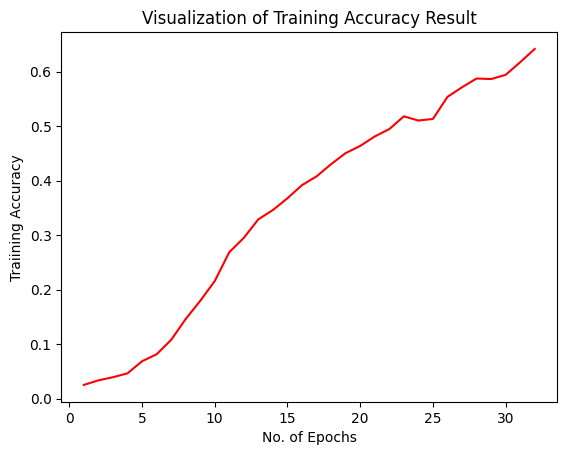

In [64]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

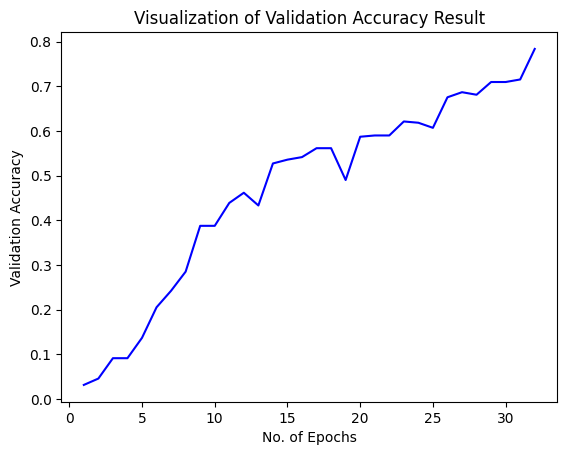

In [65]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Test Evaluation

In [66]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/alieser/Desktop/Çalışmalar/Fruit vegetable detection/archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [68]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

 2/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.8516 - loss: 0.7455

2024-07-26 20:57:45.381554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8336 - loss: 0.8069

2024-07-26 20:57:46.092303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.8143 - loss: 0.8577
Test accuracy: 0.7799443006515503


In [70]:
# Sınıf isimlerine ulaşın
class_names = train_data.class_names

# Sınıf isimlerini bir dosyaya kaydedin
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)

print("Class names have been saved to 'class_names.json'.")

Class names have been saved to 'class_names.json'.
